In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/CodingDojo/tmdb_results_combined.csv.gz")
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.106,2364.0,PG
1,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",NaN,19085.0,en,Vulgar,...,14904.0,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.500,44.0,R
2,tt0120630,0.0,/xWG7emUlBPhsJ2MyQHqH0poeXwm.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443.0,en,Chicken Run,...,224834564.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,0.0,6.763,4532.0,G
3,tt0120753,0.0,/3vUkQpnwbsFEQlMh9EORpvKJfpo.jpg,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",NaN,318.0,en,The Million Dollar Hotel,...,105983.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,0.0,5.868,295.0,R
4,tt0120755,0.0,/24DZfupDlhXeTchmcOkoGRhP5Vg.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955.0,en,Mission: Impossible II,...,546388105.0,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,0.0,6.117,6189.0,PG-13


**does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?**

null hypothesis:Rating doesnt affect the revenue of a movie

alternative hypothesis:rating affects the revenue of a movie

p-value:0.05

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                364 non-null    object 
 1   adult                  364 non-null    float64
 2   backdrop_path          355 non-null    object 
 3   belongs_to_collection  88 non-null     object 
 4   budget                 364 non-null    float64
 5   genres                 364 non-null    object 
 6   homepage               51 non-null     object 
 7   id                     364 non-null    float64
 8   original_language      364 non-null    object 
 9   original_title         364 non-null    object 
 10  overview               364 non-null    object 
 11  popularity             364 non-null    float64
 12  poster_path            364 non-null    object 
 13  production_companies   364 non-null    object 
 14  production_countries   364 non-null    object 
 15  releas

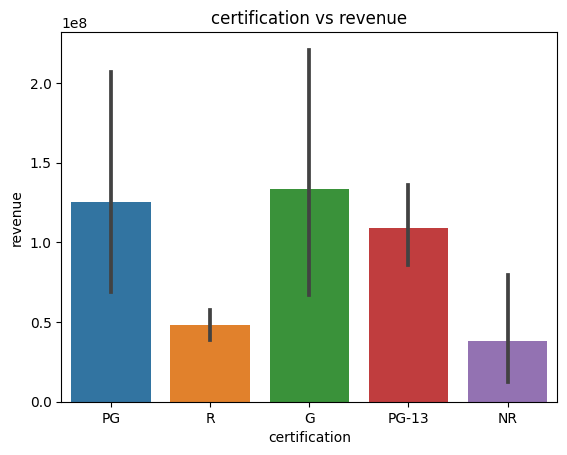

In [ ]:
ax = sns.barplot(data=df, x='certification', y='revenue')
ax.set_title('certification vs revenue');

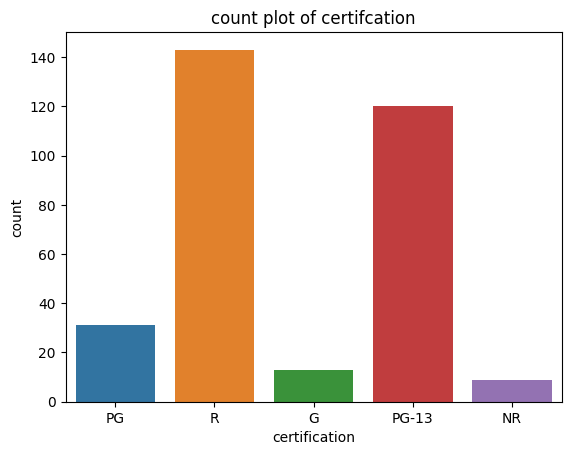

In [ ]:
ax=sns.countplot(data=df,x='certification')
ax.set_title('count plot of certifcation');

In [49]:
filtered_df=df.dropna(subset=['certification'])

In [50]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316 entries, 0 to 361
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                316 non-null    object 
 1   adult                  316 non-null    float64
 2   backdrop_path          313 non-null    object 
 3   belongs_to_collection  75 non-null     object 
 4   budget                 316 non-null    float64
 5   genres                 316 non-null    object 
 6   homepage               48 non-null     object 
 7   id                     316 non-null    float64
 8   original_language      316 non-null    object 
 9   original_title         316 non-null    object 
 10  overview               316 non-null    object 
 11  popularity             316 non-null    float64
 12  poster_path            316 non-null    object 
 13  production_companies   316 non-null    object 
 14  production_countries   316 non-null    object 
 15  releas

In [ ]:
values = filtered_df['revenue']
labels = filtered_df['certification']

In [ ]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,NR,-94848744.359,0.3468,-235520683.1856,45823194.4676,False
G,PG,-8111465.0149,0.9996,-115303589.5929,99080659.5632,False
G,PG-13,-24064275.9506,0.957,-118786652.3204,70658100.4191,False
G,R,-85317287.7902,0.0953,-179292143.5865,8657568.0061,False
NR,PG,86737279.3441,0.2997,-36096257.6938,209570816.382,False
NR,PG-13,70784468.4083,0.4156,-41332679.4095,182901616.2262,False
NR,R,9531456.5688,0.9993,-101954864.438,121017777.5755,False
PG,PG-13,-15952810.9358,0.9628,-81311911.5503,49406289.6788,False
PG,R,-77205822.7753,0.0096,-141476787.9924,-12934857.5582,True
PG-13,R,-61253011.8396,0.0004,-101414361.2133,-21091662.4658,True


There is a big difference between the revenue generated by movies rated PG,PG-13,R and the rest of the certifications

we shall reject the null hypothesis and conclude that certification greatly affects the revenue made by a movie


HYPOTHESIS TEST:does a movie being longer or shorter than 150 minutes affect the revenue of a movie??

NULL HYPOTHESIS:movies being  longer or shorter than 150 minutes do not affect the revenue of a movie

ALTERNATIVE HYPOTHESIS:movies being longer or shorter than 150 minutes affect the revenue genrated by a movie

In [20]:
#create a new column to show movies longer than 150 as true or false
df['Longer than 150'] = df['runtime'] > 150

# Replace True with 'Long' and False with 'Short'
df['Longer than 150'] = df['Longer than 150'].replace({True: 'Long', False: 'Short'})


In [30]:
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Longer than 150
0,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[Drama, Romance]",NaN,843.0,cn,花樣年華,...,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.106,2364.0,PG,Short
1,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[Drama, Horror, Thriller, Crime]",NaN,19085.0,en,Vulgar,...,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.500,44.0,R,Short
2,tt0120630,0.0,/xWG7emUlBPhsJ2MyQHqH0poeXwm.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[Animation, Comedy, Family]",NaN,7443.0,en,Chicken Run,...,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,0.0,6.763,4532.0,G,Short
3,tt0120753,0.0,/3vUkQpnwbsFEQlMh9EORpvKJfpo.jpg,NaN,8000000.0,"[Drama, Thriller]",NaN,318.0,en,The Million Dollar Hotel,...,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,0.0,5.868,295.0,R,Short
4,tt0120755,0.0,/24DZfupDlhXeTchmcOkoGRhP5Vg.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000.0,"[Adventure, Action, Thriller]",NaN,955.0,en,Mission: Impossible II,...,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,0.0,6.117,6189.0,PG-13,Short


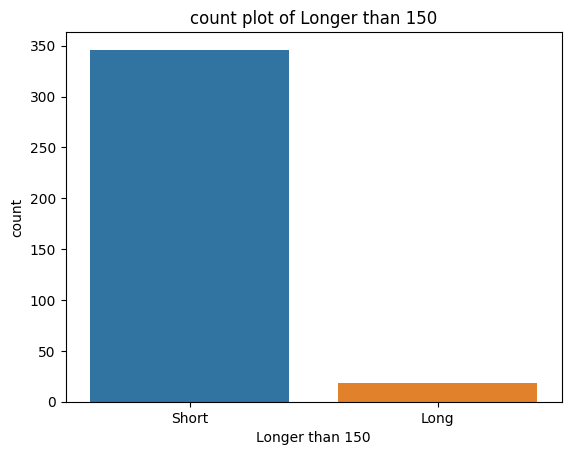

In [31]:
ax=sns.countplot(data=df,x='Longer than 150')
ax.set_title('count plot of Longer than 150');

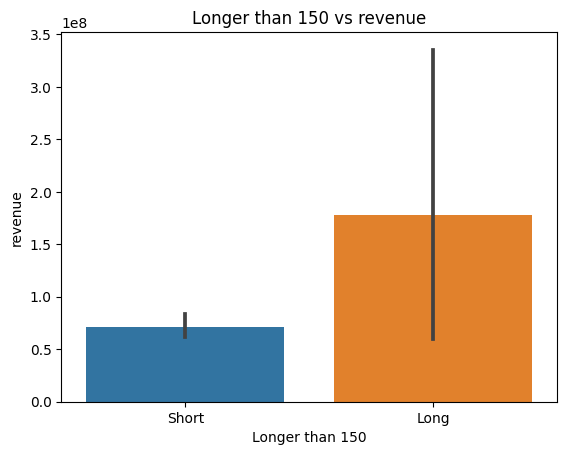

In [32]:
ax=sns.barplot(data=df, x="Longer than 150" , y='revenue')
ax.set_title('Longer than 150 vs revenue');

In [33]:
df["Longer than 150"].value_counts()

Short    346
Long      18
Name: Longer than 150, dtype: int64

In [34]:
# Filtering out those that are long
longer_df = df.loc[df['Longer than 150']== 'Long'].copy()
longer_df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Longer than 150
23,tt0151150,0.0,/moKRFO2pjDfMjEYDiS2QBqItWEL.jpg,NaN,6900000.0,"[Romance, Drama]",NaN,131940.0,hi,जोश,...,157.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Full of life,Josh,0.0,5.800,56.0,NaN,Long
51,tt0172495,0.0,/3ZVEtQxVPpEp5LNpAULDcxadTU3.jpg,"{'id': 1069584, 'name': 'Gladiator Collection'...",103000000.0,"[Action, Drama, Adventure]",NaN,98.0,en,Gladiator,...,155.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A hero will rise.,Gladiator,0.0,8.210,17094.0,NaN,Long
77,tt0187393,0.0,/c9xSFZQtC4c16Vn5CMOaB1pGk9J.jpg,NaN,110000000.0,"[Drama, History, War, Action]",NaN,2024.0,en,The Patriot,...,165.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some things are worth fighting for.,The Patriot,0.0,7.171,3580.0,R,Long
142,tt0222012,0.0,/xVyr4pHiJ0mYjOooG5QSDLM9EFw.jpg,NaN,3900000.0,"[History, Drama, Crime]",NaN,60579.0,ta,ஹே ராம்,...,199.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,An Experiment With Truth,Hey Ram,0.0,6.654,39.0,PG-13,Long
154,tt0242572,0.0,/scdsMR9iYakMGtydouJBT76iRpa.jpg,NaN,500000.0,"[Drama, Romance]",NaN,69426.0,ta,கண்டுகொண்டேன் கண்டுகொண்டேன்,...,157.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,I Have Found It.,Kandukondain Kandukondain,0.0,7.000,30.0,NaN,Long


In [35]:
# Filtering out those that are short
shorter_df = df.loc[df['Longer than 150']== 'Short'].copy()
shorter_df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Longer than 150
0,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[Drama, Romance]",NaN,843.0,cn,花樣年華,...,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.106,2364.0,PG,Short
1,tt0120467,0.0,/knok3mNReKqPTplnnqz7E4dd7mD.jpg,NaN,120000.0,"[Drama, Horror, Thriller, Crime]",NaN,19085.0,en,Vulgar,...,87.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone loves a clown... some more than others.,Vulgar,0.0,5.500,44.0,R,Short
2,tt0120630,0.0,/xWG7emUlBPhsJ2MyQHqH0poeXwm.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[Animation, Comedy, Family]",NaN,7443.0,en,Chicken Run,...,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,0.0,6.763,4532.0,G,Short
3,tt0120753,0.0,/3vUkQpnwbsFEQlMh9EORpvKJfpo.jpg,NaN,8000000.0,"[Drama, Thriller]",NaN,318.0,en,The Million Dollar Hotel,...,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Everyone has something to hide.,The Million Dollar Hotel,0.0,5.868,295.0,R,Short
4,tt0120755,0.0,/24DZfupDlhXeTchmcOkoGRhP5Vg.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000.0,"[Adventure, Action, Thriller]",NaN,955.0,en,Mission: Impossible II,...,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,0.0,6.117,6189.0,PG-13,Short


In [36]:
#define the column of interest
longer =longer_df['revenue']
shorter =shorter_df['revenue']

In [37]:
import numpy as np

In [38]:
# Check for outliers in longer group
zscores= stats.zscore(longer)
outliers = abs(zscores)>3
np.sum(outliers)

0

In [39]:
# remove outliers from longer group
long = longer[(np.abs(stats.zscore(longer)) < 3)]

In [40]:
# check for outliers in shorter group
zscores= stats.zscore(shorter)
outliers = abs(zscores)>3
np.sum(outliers)

7

In [41]:
# remove outliers from short group
short = shorter[(np.abs(stats.zscore(shorter)) < 3)]

In [42]:
# test the longer group for normality
result_long = stats.normaltest(long)
result_long

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=13.188477333874113, pvalue=0.0013682281916414167)

In [43]:
# test the shorter group for normality
result_short = stats.normaltest(short)
result_short

NormaltestResult(statistic=128.49740291550907, pvalue=1.2506721741181234e-28)

In [44]:
# Test for equal variance
result = stats.levene(long,short)
result

LeveneResult(statistic=26.84525216251872, pvalue=3.7044899876134503e-07)

In [45]:
# Independent t-test with equal_var set to False
result_1 = stats.ttest_ind(long, short , equal_var = False)
result_1

TtestResult(statistic=1.5674819807739484, pvalue=0.13529414138993462, df=17.124309941378144)

our p-value(0.13529414138993462) is greater than 0.05 so we shall reject the null hypothesis and conclude that a movie being longer or shorter than 150 minutes can affect the amount of revenue generated by a movie

HYPOTHESIS: does certification influence vote count

null hypothesis: certification doesnt influence vote count

alternative hypothesis: certification influences vote count

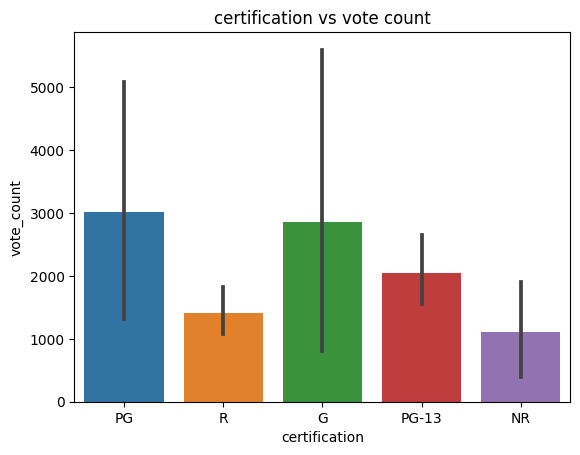

In [54]:
ax=sns.barplot(data=df,x='certification',y='vote_count')
ax.set_title('certification vs vote count');

In [51]:
values = filtered_df['vote_count']
labels = filtered_df['certification']

In [52]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,NR,-1739.2821,0.713,-5512.3763,2033.8122,False
G,PG,160.8685,0.9999,-2714.2322,3035.9691,False
G,PG-13,-798.3654,0.9104,-3339.0032,1742.2724,False
G,R,-1440.9161,0.5188,-3961.504,1079.6718,False
NR,PG,1900.1505,0.5098,-1394.4831,5194.7842,False
NR,PG-13,940.9167,0.9117,-2066.2827,3948.116,False
NR,R,298.366,0.9988,-2691.9134,3288.6453,False
PG,PG-13,-959.2339,0.5624,-2712.2917,793.824,False
PG,R,-1601.7846,0.0826,-3325.6565,122.0874,False
PG-13,R,-642.5507,0.4751,-1719.756,434.6546,False


our p-values are generally larger than our alpha value(0.05)..we shall reject the null hypothesis and conclude that certification influences vote count with PG having significantly more votes than anyother group